C:\Users\TSE9\AppData\Local\Temp\ipykernel_9636\9520760.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Durbin-Watson Statistic: 0.0074


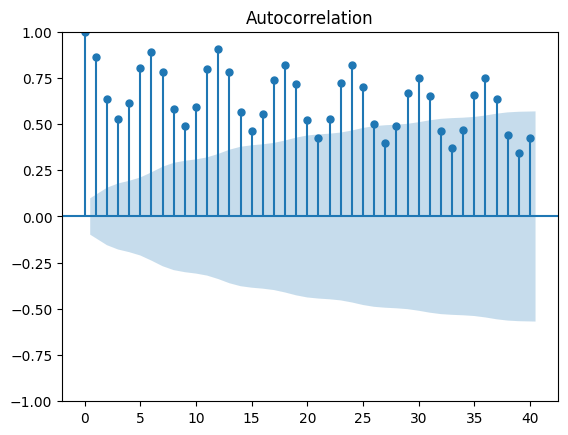

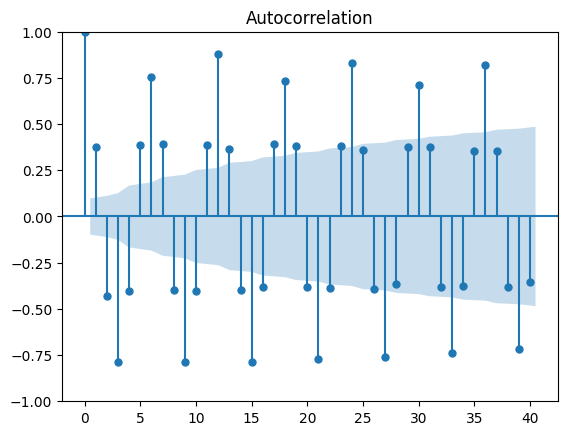

In [71]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Data Loading and Preprocessing
# Load dataset
df = pd.read_csv("Electric_Production.csv")

# Convert date column to datetime and set it as index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Handle missing values (Forward Fill)
df.fillna(method='ffill', inplace=True)

# Plot raw time series using Plotly
fig = px.line(df, x=df.index, y=df.columns[0], title="Electric Production Time Series")
fig.show()

# 2. Understanding Autocorrelation in Time Series
# Compute and plot ACF using statsmodels
plot_acf(df[df.columns[0]], lags=40)

# Compute Autocorrelation Function (ACF) values
acf_values = acf(df[df.columns[0]], nlags=40)

# Compute confidence intervals for ACF
conf_interval = 1.96 / np.sqrt(len(df))

# Plot ACF with confidence intervals using Plotly
acf_fig = go.Figure()
acf_fig.add_trace(go.Bar(x=list(range(len(acf_values))), y=acf_values, name="ACF"))
acf_fig.add_trace(go.Scatter(x=list(range(len(acf_values))), y=[conf_interval]*len(acf_values), mode='lines', line=dict(dash='dash'), name='Upper Bound'))
acf_fig.add_trace(go.Scatter(x=list(range(len(acf_values))), y=[-conf_interval]*len(acf_values), mode='lines', line=dict(dash='dash'), name='Lower Bound'))
acf_fig.update_layout(title="Autocorrelation Function (ACF)", xaxis_title="Lags", yaxis_title="ACF Value")
acf_fig.show()

# Apply differencing to remove trend
df_diff = df.diff().dropna()

# Compute and plot ACF after differencing
plot_acf(df_diff[df.columns[0]], lags=40)

# Compute ACF after differencing
acf_values_diff = acf(df_diff[df.columns[0]], nlags=40)

# Plot ACF after differencing with confidence intervals
acf_diff_fig = go.Figure()
acf_diff_fig.add_trace(go.Bar(x=list(range(len(acf_values_diff))), y=acf_values_diff, name="ACF After Differencing"))
acf_diff_fig.add_trace(go.Scatter(x=list(range(len(acf_values_diff))), y=[conf_interval]*len(acf_values_diff), mode='lines', line=dict(dash='dash'), name='Upper Bound'))
acf_diff_fig.add_trace(go.Scatter(x=list(range(len(acf_values_diff))), y=[-conf_interval]*len(acf_values_diff), mode='lines', line=dict(dash='dash'), name='Lower Bound'))
acf_diff_fig.update_layout(title="ACF After Differencing", xaxis_title="Lags", yaxis_title="ACF Value")
acf_diff_fig.show()

# 3. Identifying Trend in the Time Series
# Compute rolling mean and standard deviation
df['Rolling_Mean'] = df[df.columns[0]].rolling(window=12).mean()
df['Rolling_Std'] = df[df.columns[0]].rolling(window=12).std()

# Plot rolling statistics using Plotly
rolling_fig = go.Figure()
rolling_fig.add_trace(go.Scatter(x=df.index, y=df[df.columns[0]], mode='lines', name='Original Data'))
rolling_fig.add_trace(go.Scatter(x=df.index, y=df['Rolling_Mean'], mode='lines', name='Rolling Mean'))
rolling_fig.add_trace(go.Scatter(x=df.index, y=df['Rolling_Std'], mode='lines', name='Rolling Std Dev'))
rolling_fig.update_layout(title="Rolling Mean & Standard Deviation", xaxis_title="Date", yaxis_title="Production")
rolling_fig.show()

# Seasonal decomposition
result = seasonal_decompose(df[df.columns[0]], model='additive', period=12)

# Plot seasonal decomposition using Plotly
decomp_fig = sp.make_subplots(rows=3, cols=1, subplot_titles=("Trend", "Seasonality", "Residuals"))
decomp_fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=1, col=1)
decomp_fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonality'), row=2, col=1)
decomp_fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residuals'), row=3, col=1)
decomp_fig.update_layout(title="Seasonal Decomposition", xaxis_title="Date", yaxis_title="Value", showlegend=False)
decomp_fig.show()

# ACF & PACF Calculation
acf_values = acf(df[df.columns[0]].dropna(), nlags=40)
pacf_values = pacf(df[df.columns[0]].dropna(), nlags=40)
lags = np.arange(len(acf_values))

# Plot ACF & PACF using Plotly
acf_pacf_fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation Function (ACF)", "Partial ACF"))
acf_pacf_fig.add_trace(go.Bar(x=lags, y=acf_values, name="ACF"), row=1, col=1)
acf_pacf_fig.add_trace(go.Bar(x=lags, y=pacf_values, name="PACF"), row=1, col=2)
acf_pacf_fig.update_layout(title="ACF and PACF Plots", showlegend=False)
acf_pacf_fig.show()

# Durbin-Watson Test
dw_statistic = durbin_watson(df[df.columns[0]].dropna())
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")

Durbin-Watson Test for Autocorrelation
A value close to 2 suggests no autocorrelation.
A value <2 indicates positive autocorrelation.
A value >2 suggests negative autocorrelation.